# Stock Screener

### Dans ce stock screener, j'aurais besoin de : <br><br>
<ol>
    <li>Données sur forex et crypto en temps réel </li><br>
    <li>Une fréquence de mise à jour, qui se fera toute les 30 secondes </li><br>
    <li>L'analyse financière puis une Data Visualisation sur streamLit </li><br>
    <li>Ajouter des alertes de prix, des flux de données éco </li><br>
</ol>

    



In [5]:
from datetime import datetime, timedelta
from yahoo_fin import stock_info as si
import pandas as pd
import mplfinance as mpf

ticker = "INTC"
end_date = datetime.now()
start_date = end_date-timedelta(days=600)

historical_prices = si.get_data(ticker, start_date=start_date, end_date=end_date)
df = historical_prices

ma80 = df['close'].rolling(80).mean()


# Donne la tendance de fond
def tendancesDeF():
    if ma80.iloc[-1] > si.get_live_price(ticker):
        print("La tendance de fond est baissière sur ", ticker)
    else :
        print("La tendance de fond est haussière sur", ticker)

tendancesDeF()


top5TradableStocks = si.get_day_most_active().head()["Symbol"]

display(top5TradableStocks)

# Indique si Oui ou Non il faut trader ce stock en ce moment


def Tradable(myTicker):
    for symbol in si.get_day_most_active()["Symbol"]:
        if symbol == myTicker.upper():
            return "OUI"
    return "NON"

Tradable("AMZN")


La tendance de fond est baissière sur  INTC


0    TSLA
1       F
2     AMC
3    PLTR
4    INTC
Name: Symbol, dtype: object

'OUI'

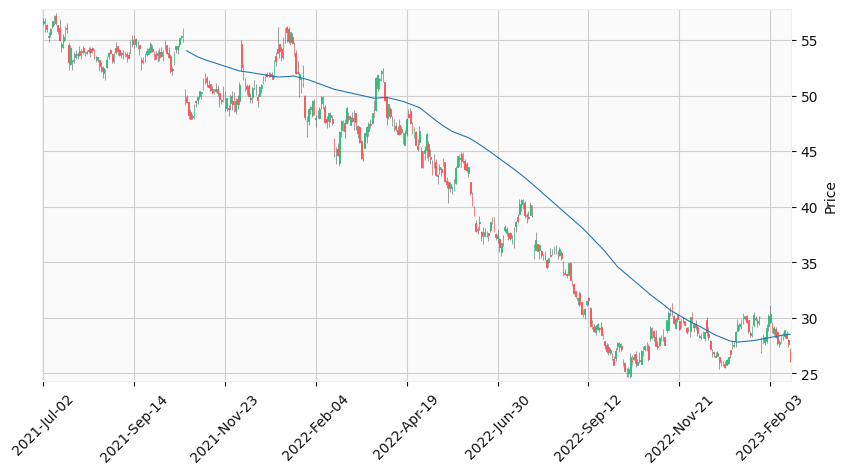

In [2]:
mpf_params = {
    'type': 'candle', 
    'mav': 80, 
    'volume': False, 
    'figratio': (12,6), 
    'figscale': 0.75
}

mpf.plot(df, **mpf_params, tight_layout=True, style='yahoo')

In [22]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np

# URL de la page à récupérer
url = 'https://www.investing.com/economic-calendar/'

# Effectuer une requête GET
response = requests.get(url)

# Créer un objet BeautifulSoup à partir de la réponse
soup = BeautifulSoup(response.text, 'html.parser')

# Trouver la table avec l'ID "economicCalendarData"
table = soup.find('table', {'id': 'economicCalendarData'})

# Extraire les noms de colonnes depuis le premier <thead>
thead = table.find_all('thead')[0]
cols = [col.get_text().strip() for col in thead.find_all('th')]

# Créer une liste vide pour stocker les données
data = []

# Extraire les données depuis la deuxième <tbody>
tbody = table.find('tbody')
for row in tbody.find_all('tr'):
    # Extraire les colonnes de chaque ligne
    cols_row = [col.get_text().strip() for col in row.find_all('td')]
    
    # Mettre à jour la colonne "Importance" en fonction de la valeur de l'attribut "title" de chaque élément "td"
    for i, col in enumerate(row.find_all('td')):
        if 'High Volatility Expected' in col.get('title', ''):
            cols_row[i] = 'fort'
        elif 'Moderate Volatility Expected' in col.get('title', ''):
            cols_row[i] = 'moyen'
        elif 'Low Volatility Expected' in col.get('title', ''):
            cols_row[i] = 'faible'

    # Supprimer la première colonne correspondant à la date du jour
    cols_row.pop(0)
    # Ajouter les colonnes à la liste de données
    data.append(cols_row)


# Créer un DataFrame pandas à partir des données et des noms de colonnes
df = pd.DataFrame(data, columns=cols[1:])
df = df.iloc[1:]
df = df.drop('', axis=1)
df.iloc[:, 0:1] = df.iloc[:, 0:1].where(df.iloc[:, 0:1].apply(lambda x: x.str.strip() != ''), other=np.nan)
df.iloc[:, 3:] = df.iloc[:, 3:].where(df.iloc[:, 3:].apply(lambda x: x.str.strip() != ''), other=np.nan)
df = df.rename(columns={'Cur.': 'Currency', 'Imp.': 'Importance'})
df.dropna(subset=["Currency"], inplace=True)
df = df.reset_index(drop=True)

# Afficher le contenu du premier <td> avec la classe "theDay"
print(soup.find_all('td', {'class': 'theDay'})[0].get_text().strip())

# Afficher le DataFrame
df

Thursday, February 23, 2023


,Currency,Importance,Event,Actual,Forecast,Previous
0,SGD,moyen,Core CPI (YoY) (Jan),5.50%,5.60%,5.10%
1,SGD,moyen,CPI (YoY) (Jan),6.6%,7.1%,6.5%
2,AUD,moyen,RBA Assist Gov Bullock Speaks,NaN,NaN,NaN
3,AUD,faible,RBA Cagliarini Speaks,NaN,NaN,NaN
4,HKD,faible,CPI (YoY) (Jan),NaN,1.90%,2.00%
5,GBP,moyen,BoE MPC Member Mann,NaN,NaN,NaN
6,ZAR,faible,PPI (YoY) (Jan),NaN,12.8%,13.5%
7,ZAR,faible,PPI (MoM) (Jan),NaN,-0.4%,NaN
8,EUR,faible,Core CPI (MoM) (Jan),NaN,-0.8%,-0.8%
9,EUR,moyen,Core CPI (YoY) (Jan),NaN,5.2%,5.2%
